<a href="https://colab.research.google.com/github/EmoChat/EmoChat/blob/master/EmoChat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import *

In [2]:
import matplotlib.pylab as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tqdm import tqdm

from keras.preprocessing import image
import pathlib
import pandas as pd

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [21]:
batch_size = 32
img_height = 32
img_width = 32
IMG_SHAPE = (img_height, img_width, 3)
class_names = ["Disgusted", "Happy", "Neutral", "Angry", "Surprise"]

In [22]:
train = pd.read_csv('emotion.csv', names=['File_name', 'Label'])

In [27]:

train_image = [ ]

for i in tqdm(range(1, train.shape[0])):

  img = image.load_img('drive/My Drive/images/'+train['File_name'][i], target_size=(img_height,img_width,3), 
              grayscale=False)
  img = image.img_to_array(img)
  img = img/255
  train_image.append(img)

X = np.array(train_image)




100%|██████████| 224/224 [00:00<00:00, 746.34it/s]


In [28]:
train_labels = train.Label.to_list()
train_labels = list(map(int, train_labels[1:]))

In [32]:
VGG_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
VGG_model.trainable = False

In [33]:
model = tf.keras.Sequential()
model.add(VGG_model)
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

[1, 2, 2, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 4, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
224
224
[[[0.         0.00392157 0.        ]
  [0.00784314 0.00392157 0.        ]
  [0.10980392 0.09411765 0.04705882]
  ...
  [0.2901961  0.24313726 0.1882353 ]
  [0.17254902 0.15686275 0.11372549]
  [0.03137255 0.01568628 0.00392157]]

 [[0.         0.00392157 0.        ]
  [0.01568628 0.01176471 0.        ]
  [0.10980392 0

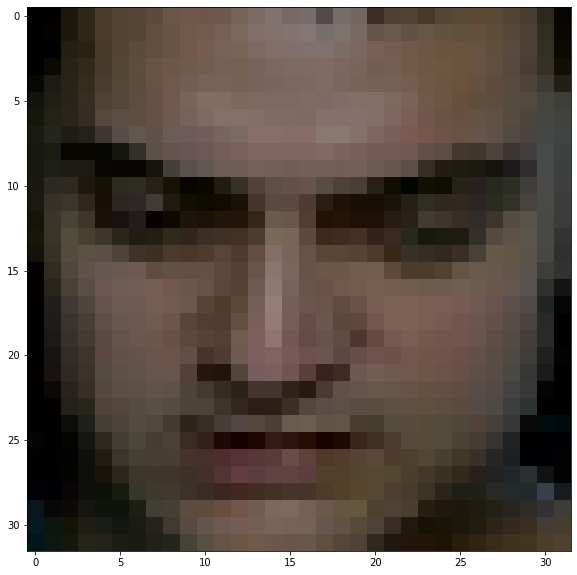

In [45]:
print(train_labels)
print(len(train_labels))
print(len(train_image))
plt.figure(figsize=(10, 10))
img = train_image[1]
plt.imshow(img)
print(img)

In [44]:
print(train_image)

[array([[[0.56078434, 0.62352943, 0.62352943],
        [0.627451  , 0.64705884, 0.65882355],
        [0.5882353 , 0.6039216 , 0.6156863 ],
        ...,
        [0.31764707, 0.28627452, 0.23529412],
        [0.05098039, 0.09803922, 0.09019608],
        [0.        , 0.03921569, 0.01568628]],

       [[0.53333336, 0.59607846, 0.59607846],
        [0.60784316, 0.627451  , 0.6392157 ],
        [0.5372549 , 0.57254905, 0.5529412 ],
        ...,
        [0.35686275, 0.32941177, 0.25490198],
        [0.06666667, 0.11764706, 0.09019608],
        [0.01176471, 0.07058824, 0.04313726]],

       [[0.56078434, 0.60784316, 0.6       ],
        [0.5921569 , 0.627451  , 0.62352943],
        [0.5254902 , 0.56078434, 0.54901963],
        ...,
        [0.36078432, 0.32941177, 0.28627452],
        [0.10588235, 0.15686275, 0.12156863],
        [0.00784314, 0.07450981, 0.05098039]],

       ...,

       [[0.00392157, 0.02352941, 0.        ],
        [0.        , 0.00784314, 0.        ],
        [0.07058824, 

In [36]:
epochs = 100
features = np.array(train_image)
labels = np.array(train_labels)
history = model.fit(x=features,
                      y=labels,
                      batch_size=batch_size,
                      epochs=epochs)

Epoch 1/100
7/7 [==============================] - 2s 283ms/step - loss: 1.3562 - accuracy: 0.4463
Epoch 2/100
7/7 [==============================] - 2s 276ms/step - loss: 0.9210 - accuracy: 0.6719
Epoch 3/100
7/7 [==============================] - 2s 277ms/step - loss: 0.6862 - accuracy: 0.7010
Epoch 4/100
7/7 [==============================] - 2s 282ms/step - loss: 0.5922 - accuracy: 0.6802
Epoch 5/100
7/7 [==============================] - 2s 283ms/step - loss: 0.5087 - accuracy: 0.6712
Epoch 6/100
7/7 [==============================] - 2s 284ms/step - loss: 0.4337 - accuracy: 0.6709
Epoch 7/100
7/7 [==============================] - 2s 278ms/step - loss: 0.3670 - accuracy: 0.6569
Epoch 8/100
7/7 [==============================] - 2s 281ms/step - loss: 0.3232 - accuracy: 0.6529
Epoch 9/100
7/7 [==============================] - 2s 281ms/step - loss: 0.2782 - accuracy: 0.6498
Epoch 10/100
7/7 [==============================] - 2s 277ms/step - loss: 0.2274 - accuracy: 0.6387
Epoch 11/